# Logistic Data Analysis

This notebook is analyzing the Logistic simulation study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 500

# b0.01 case


In [2]:
load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.01.pkl"
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.1.pkl"
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_bAUTO.pkl"


#loading the data

df = pd.read_pickle(load_path)

df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.3,5,b0.01,1000,1000,1
1,0.304718,0.3,5,b0.01,1000,1000,1
2,0.225792,0.3,5,b0.01,1000,1000,1
3,0.165569,0.3,5,b0.01,1000,1000,1
4,0.131693,0.3,5,b0.01,1000,1000,1
...,...,...,...,...,...,...,...
119995,0.812847,0.7,10,b0.01,100,100,150
119996,0.789218,0.7,10,b0.01,100,100,150
119997,0.766024,0.7,10,b0.01,100,100,150
119998,0.742993,0.7,10,b0.01,100,100,150


In [3]:
df.shape[0] #


45000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45000000 entries, 0 to 119999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   alpha_hat  float64
 1   alpha      float64
 2   dim        int32  
 3   b          object 
 4   xsize      int32  
 5   ysize      int32  
 6   ID         int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 2.0+ GB


# Notes



* A LOT of NaN values
* when b0.01 or 0.1 it's even worse, AUTO is slightly better
* 0.05, 0.1 and 0.95 fail, 0.3 and 0.7 seem to work more or less
* estimation gets better with bigger d, higher xsize and higher ysize

# Full Aggregation

In [5]:
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.3,5,b0.01,1000,1000,1
1,0.304718,0.3,5,b0.01,1000,1000,1
2,0.225792,0.3,5,b0.01,1000,1000,1
3,0.165569,0.3,5,b0.01,1000,1000,1
4,0.131693,0.3,5,b0.01,1000,1000,1
...,...,...,...,...,...,...,...
119995,0.812847,0.7,10,b0.01,100,100,150
119996,0.789218,0.7,10,b0.01,100,100,150
119997,0.766024,0.7,10,b0.01,100,100,150
119998,0.742993,0.7,10,b0.01,100,100,150


In [6]:
# %%
def last_150_rows(group):
    return group.tail(150)

full_group_by = ["alpha", "dim", "b", "xsize", "ysize", "ID"]

df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)

df_last_150

# %%
df_last_150_aggregated = df_last_150.groupby(full_group_by).agg(["count", 'mean', "std"])
df_last_150_aggregated

# %% [markdown]
# # correct aggregation
# 

# %%
df_last_150_sanity = df_last_150.groupby(full_group_by).agg(['mean'])
df_last_150_sanity_index_reset = df_last_150_sanity.reset_index()
df_last_150_sanity_index_reset

# %%
df_last_150_proper_aggregation = df_last_150_sanity.reset_index().drop(["ID"], axis=1).groupby(["alpha", "dim", "b", "xsize", "ysize"]).agg(["count","mean", "std"])
df_last_150_proper_aggregation

# %%
df_last_150_proper_aggregation.columns = df_last_150_proper_aggregation.columns.droplevel(level=1)
df_last_150_proper_aggregation

# %%
df_last_150_proper_aggregation_index_reset = df_last_150_proper_aggregation.reset_index()
df_last_150_proper_aggregation_index_reset.head()

# %%


# %%




C:\Users\nickk\AppData\Local\Temp\ipykernel_24380\1890761486.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)
C:\Users\nickk\AppData\Local\Temp\ipykernel_24380\1890761486.py:25: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_last_150_proper_aggregation = df_last_150_sanity.reset_index().drop(["ID"], axis=1).groupby(["alpha", "dim", "b", "xsize", "ysize"]).agg(["count","mean", "std"])


alpha dim      b xsize ysize alpha_hat                    
                                   count      mean       std
0  0.05   1  b0.01    50    50         7  0.498718  0.049592
1  0.05   1  b0.01   100    50        14  0.478022  0.164121
2  0.05   1  b0.01   100   100        13  0.535243  0.184714
3  0.05   1  b0.01   200    50        29  0.492002  0.227716
4  0.05   1  b0.01   200   100        18  0.521967  0.256115

In [ ]:
# %%
saving_path_result_data = f"/home/users/k/kipfer2/Logistics_processed_results/processed_tables"

# %%
data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="b0.1"]
data_output.to_pickle(f"{saving_path_result_data}/Logistics_result_b0.1.pkl")

# %%
data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="b0.01"]
data_output.to_pickle(f"{saving_path_result_data}/Logistics_result_b0.01.pkl")

data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="bAUTO"]
data_output.to_pickle(f"{saving_path_result_data}/Logistics_result_bAUTO.pkl")

# Convergence plots b0.01 case

In [7]:
df = df.reset_index(drop=True)
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.3,5,b0.01,1000,1000,1
1,0.304718,0.3,5,b0.01,1000,1000,1
2,0.225792,0.3,5,b0.01,1000,1000,1
3,0.165569,0.3,5,b0.01,1000,1000,1
4,0.131693,0.3,5,b0.01,1000,1000,1
...,...,...,...,...,...,...,...
44999995,0.812847,0.7,10,b0.01,100,100,150
44999996,0.789218,0.7,10,b0.01,100,100,150
44999997,0.766024,0.7,10,b0.01,100,100,150
44999998,0.742993,0.7,10,b0.01,100,100,150


In [8]:
df.columns

Index(['alpha_hat', 'alpha', 'dim', 'b', 'xsize', 'ysize', 'ID'], dtype='object')

In [9]:
df.shape[0]/800/150 # in total there are 3*375 parameter combinations, this checks out

375.0

In [10]:
number_iterations = 800
df = pd.concat([df, pd.DataFrame.from_dict({"Iteration": np.tile(np.arange(number_iterations),int(df.shape[0]/number_iterations))})], axis=1)
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID,Iteration
0,0.400000,0.3,5,b0.01,1000,1000,1,0
1,0.304718,0.3,5,b0.01,1000,1000,1,1
2,0.225792,0.3,5,b0.01,1000,1000,1,2
3,0.165569,0.3,5,b0.01,1000,1000,1,3
4,0.131693,0.3,5,b0.01,1000,1000,1,4
...,...,...,...,...,...,...,...,...
44999995,0.812847,0.7,10,b0.01,100,100,150,795
44999996,0.789218,0.7,10,b0.01,100,100,150,796
44999997,0.766024,0.7,10,b0.01,100,100,150,797
44999998,0.742993,0.7,10,b0.01,100,100,150,798


In [11]:
param_combinations = df.groupby(["alpha", "dim", "b", "xsize", "ysize"]).groups.keys()
param_combinations

dict_keys([(0.05, 1, 'b0.01', 50, 50), (0.05, 1, 'b0.01', 100, 50), (0.05, 1, 'b0.01', 100, 100), (0.05, 1, 'b0.01', 200, 50), (0.05, 1, 'b0.01', 200, 100), (0.05, 1, 'b0.01', 200, 200), (0.05, 1, 'b0.01', 500, 50), (0.05, 1, 'b0.01', 500, 100), (0.05, 1, 'b0.01', 500, 200), (0.05, 1, 'b0.01', 500, 500), (0.05, 1, 'b0.01', 1000, 50), (0.05, 1, 'b0.01', 1000, 100), (0.05, 1, 'b0.01', 1000, 200), (0.05, 1, 'b0.01', 1000, 500), (0.05, 1, 'b0.01', 1000, 1000), (0.05, 2, 'b0.01', 50, 50), (0.05, 2, 'b0.01', 100, 50), (0.05, 2, 'b0.01', 100, 100), (0.05, 2, 'b0.01', 200, 50), (0.05, 2, 'b0.01', 200, 100), (0.05, 2, 'b0.01', 200, 200), (0.05, 2, 'b0.01', 500, 50), (0.05, 2, 'b0.01', 500, 100), (0.05, 2, 'b0.01', 500, 200), (0.05, 2, 'b0.01', 500, 500), (0.05, 2, 'b0.01', 1000, 50), (0.05, 2, 'b0.01', 1000, 100), (0.05, 2, 'b0.01', 1000, 200), (0.05, 2, 'b0.01', 1000, 500), (0.05, 2, 'b0.01', 1000, 1000), (0.05, 5, 'b0.01', 50, 50), (0.05, 5, 'b0.01', 100, 50), (0.05, 5, 'b0.01', 100, 100), (0

In [15]:
saving_path_convergence = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Convergence_charts"

: 

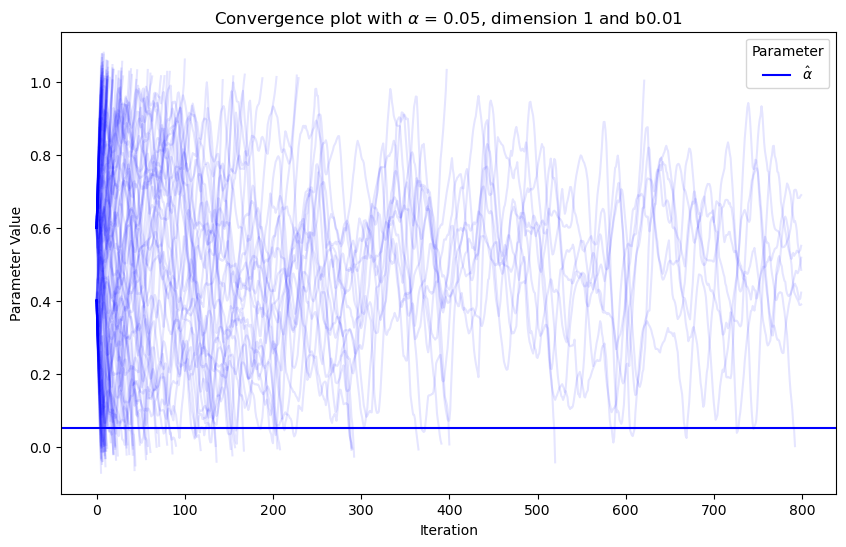

created and saved 1 figures


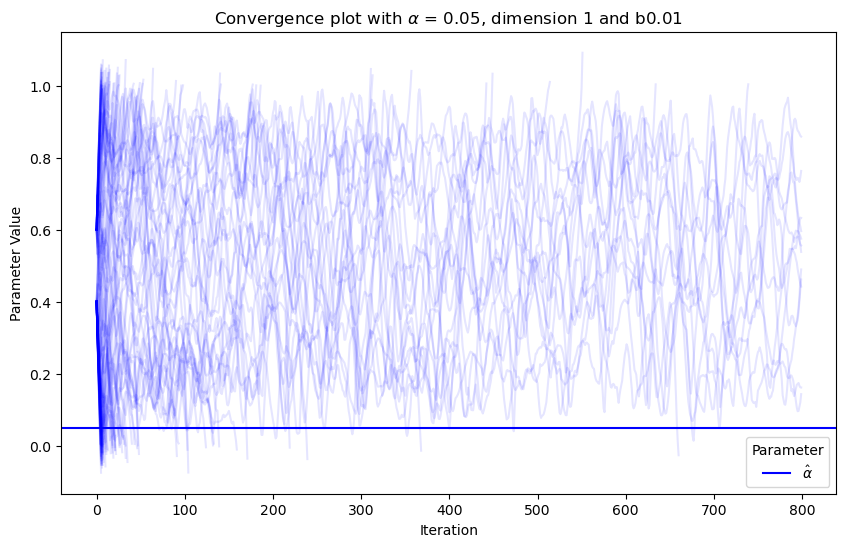

created and saved 2 figures


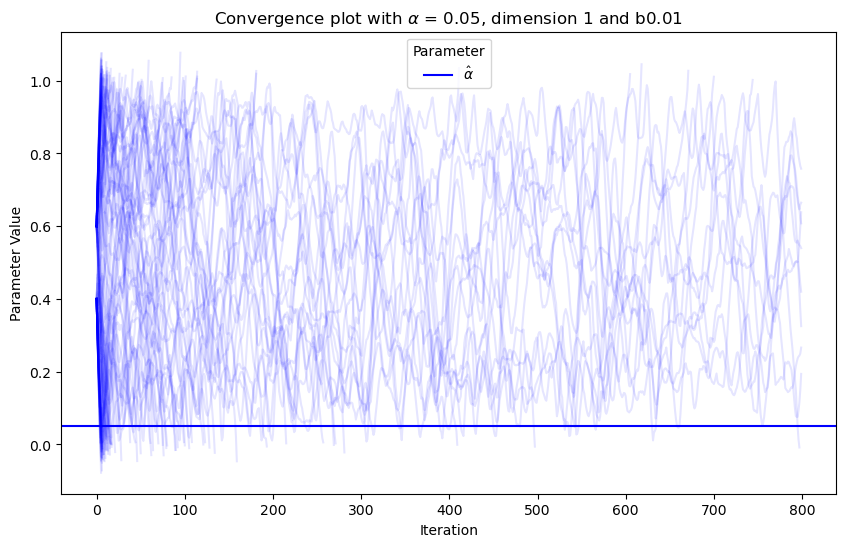

created and saved 3 figures


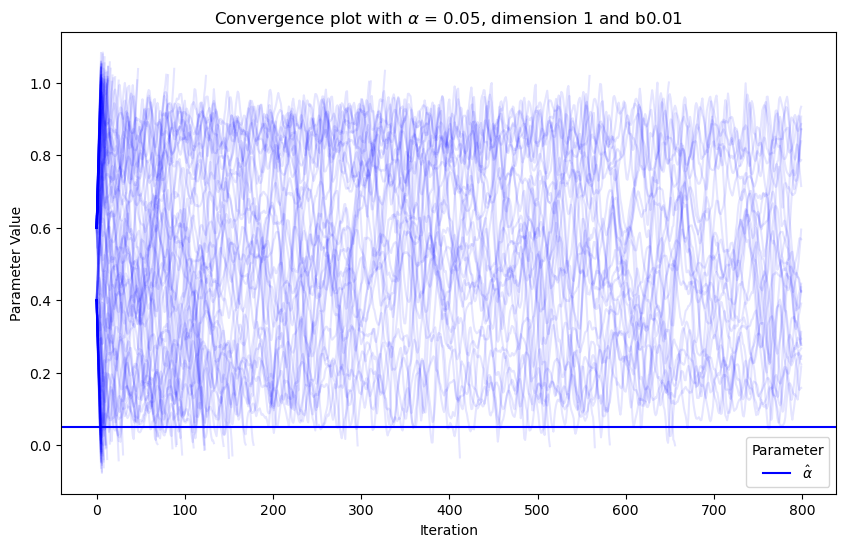

created and saved 4 figures


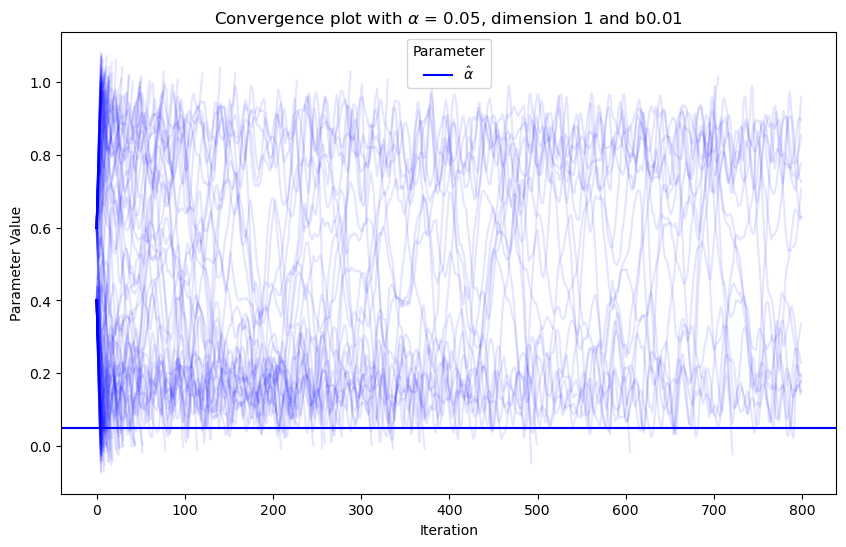

created and saved 5 figures


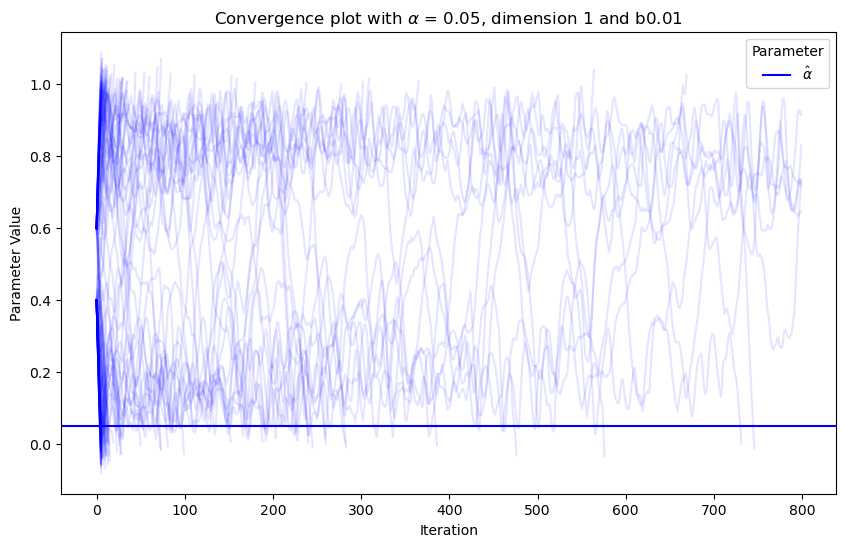

created and saved 6 figures


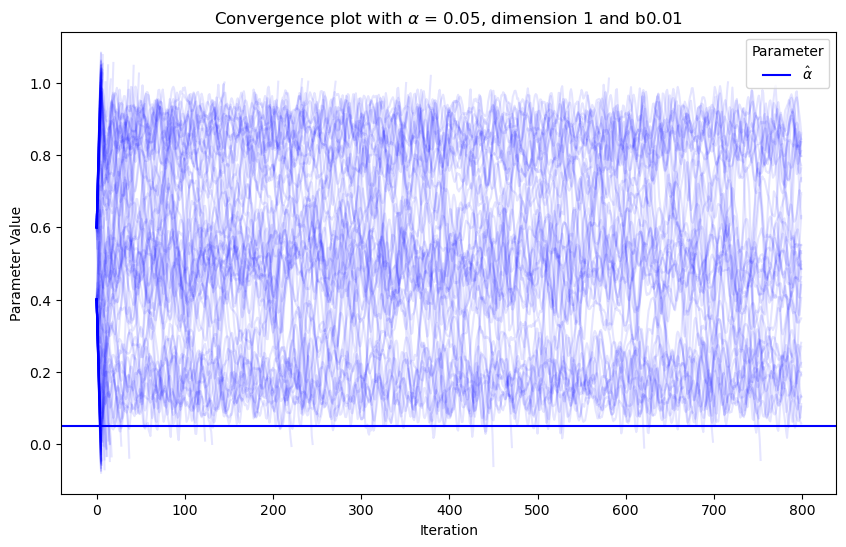

created and saved 7 figures


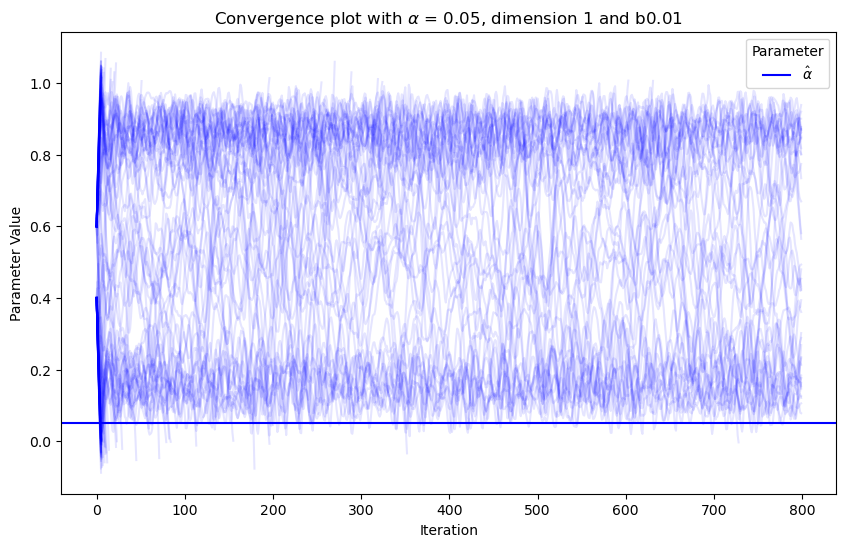

created and saved 8 figures


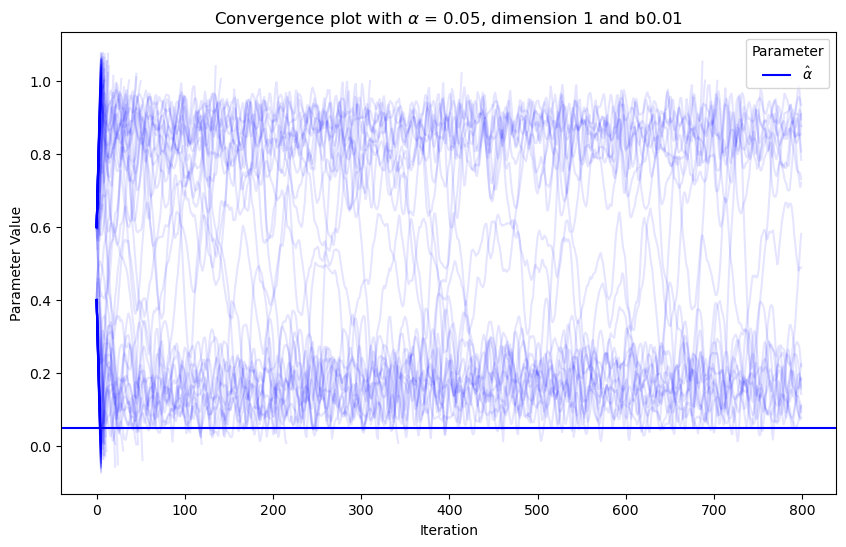

created and saved 9 figures


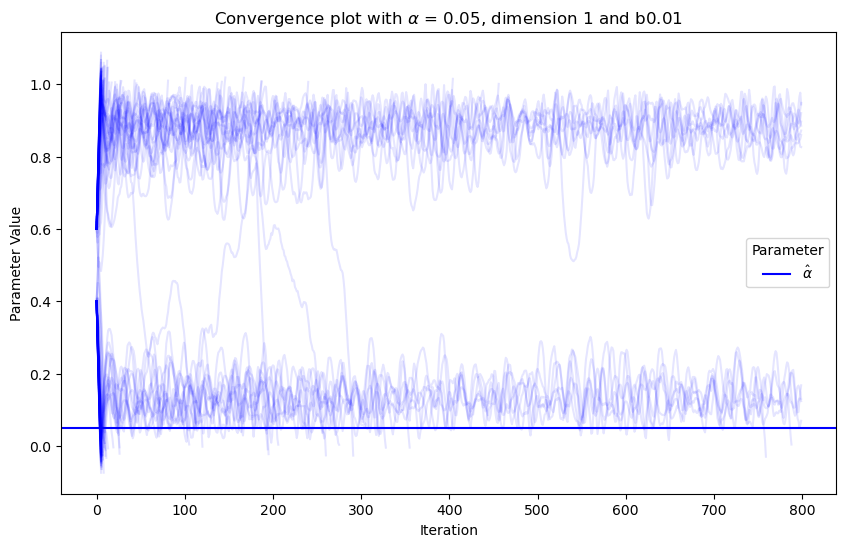

created and saved 10 figures


In [20]:
counter = 0
for mu, sigma, b, xsize, ysize in param_combinations:
    simulations_df = df[(df["alpha"]==alpha) & (df["dim"]==dim) 
		     & (df["b"]==b) & (df["xsize"]==xsize) & (df["ysize"]==ysize)]
	
    melted_df = simulations_df.melt(id_vars=["ID", "Iteration"],
		    value_vars=["alpha_hat"],
		    var_name = "param_type",
		    value_name = "param_value")
    

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Plot all lines for each ID
    for param_type, color in zip(["alpha_hat"], ["blue"]):
        subset = melted_df[melted_df["param_type"] == param_type]
        sns.lineplot(data=subset, x='Iteration', y='param_value', units='ID', estimator=None, color=color, alpha=0.1)
    
    # Add horizontal reference lines for mu and sigma
    plt.axhline(y=alpha, color="blue", linestyle='-', label=r'$\hat\alpha$')
    
    
    plt.ylabel("Parameter Value")

    alpha_symbol = r'$\alpha$'
    plt.title(f"Convergence plot with {alpha_symbol} = {alpha}, dimension {dim} and {b}")

    # Adjust the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Parameter')
    
    file_name = f"alpha{alpha}_dim{dim}_b{b}_xsize{xsize}_ysize{ysize}.png"
    #plt.savefig(f"{saving_path_convergence}/{file_name}")
    plt.show()
    plt.close()

    counter += 1
    print(f"created and saved {counter} figures")

    if counter == 10:

        break

# b0.1 case

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 500

# b0.1 case


In [10]:
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.01.pkl"
load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.1.pkl"
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_bAUTO.pkl"


#loading the data

df = pd.read_pickle(load_path)

df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.10,5,b0.1,500,50,1
1,0.299909,0.10,5,b0.1,500,50,1
2,0.200820,0.10,5,b0.1,500,50,1
3,0.105228,0.10,5,b0.1,500,50,1
4,0.020195,0.10,5,b0.1,500,50,1
...,...,...,...,...,...,...,...
119995,NaN,0.05,2,b0.1,1000,1000,150
119996,NaN,0.05,2,b0.1,1000,1000,150
119997,NaN,0.05,2,b0.1,1000,1000,150
119998,NaN,0.05,2,b0.1,1000,1000,150


In [11]:
df.shape[0] 


45000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45000000 entries, 0 to 119999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   alpha_hat  float64
 1   alpha      float64
 2   dim        int32  
 3   b          object 
 4   xsize      int32  
 5   ysize      int32  
 6   ID         int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 2.0+ GB


# Notes



# Full Aggregation

In [13]:
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.10,5,b0.1,500,50,1
1,0.299909,0.10,5,b0.1,500,50,1
2,0.200820,0.10,5,b0.1,500,50,1
3,0.105228,0.10,5,b0.1,500,50,1
4,0.020195,0.10,5,b0.1,500,50,1
...,...,...,...,...,...,...,...
119995,NaN,0.05,2,b0.1,1000,1000,150
119996,NaN,0.05,2,b0.1,1000,1000,150
119997,NaN,0.05,2,b0.1,1000,1000,150
119998,NaN,0.05,2,b0.1,1000,1000,150


In [14]:
def last_150_rows(group):
    return group.tail(150)

full_group_by = ["alpha", "dim", "b", "xsize", "ysize", "ID"]

df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)

df_last_150

C:\Users\nickk\AppData\Local\Temp\ipykernel_5868\3397296398.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)


,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,NaN,0.05,1,b0.1,50,50,1
1,NaN,0.05,1,b0.1,50,50,1
2,NaN,0.05,1,b0.1,50,50,1
3,NaN,0.05,1,b0.1,50,50,1
4,NaN,0.05,1,b0.1,50,50,1
...,...,...,...,...,...,...,...
8437495,NaN,0.95,20,b0.1,1000,1000,150
8437496,NaN,0.95,20,b0.1,1000,1000,150
8437497,NaN,0.95,20,b0.1,1000,1000,150
8437498,NaN,0.95,20,b0.1,1000,1000,150


In [15]:
df_last_150_aggregated = df_last_150.groupby(full_group_by).agg(["count", 'mean', "std"])
df_last_150_aggregated

alpha_hat         
                                   count mean std
alpha dim b    xsize ysize ID                    
0.05  1   b0.1 50    50    1           0  NaN NaN
                           2           0  NaN NaN
                           3           0  NaN NaN
                           4           0  NaN NaN
                           5           0  NaN NaN
...                                  ...  ...  ..
0.95  20  b0.1 1000  1000  146         0  NaN NaN
                           147         0  NaN NaN
                           148         0  NaN NaN
                           149         0  NaN NaN
                           150         0  NaN NaN

[56250 rows x 3 columns]

In [16]:
df_last_150_aggregated_mean_ID_alternative = df_last_150.drop(["ID"],axis=1).groupby(["alpha", "dim", "b", "xsize", "ysize"]).agg(["count", 'mean', "std"])
df_last_150_aggregated_mean_ID_alternative

alpha_hat                    
                               count      mean       std
alpha dim b    xsize ysize                              
0.05  1   b0.1 50    50          914  0.539807  0.148404
               100   50         1950  0.492980  0.145666
                     100         750  0.524660  0.162670
               200   50         2687  0.515678  0.206412
                     100        2046  0.513622  0.215213
                     200         600  0.333546  0.155111
               500   50         6119  0.524558  0.241948
                     100        3580  0.559008  0.205307
                     200        2876  0.571328  0.314505
                     500         951  0.746138  0.276083
               1000  50         6313  0.496009  0.266266
                     100        4950  0.559039  0.285077
                     200        4350  0.569913  0.304499
                     500        1800  0.566501  0.365575
                     1000        150  0.165251  0.042624
      2   b0.1 50    50          450  0.286706  0.119244
               100   50         1211  0.307318  0.104399
                     100         367  0.247571  0.086497
               200   50         2696  0.278008  0.099003
                     100        1405  0.222099  0.087860
                     200          48  0.148157  0.041773
               500   50         3991  0.271191  0.093414
                     100        2700  0.226446  0.069917
                     200         450  0.177252  0.066546
                     500         150  0.189995  0.047610
               1000  50         3975  0.251245  0.085099
                     100        2100  0.232375  0.064790
                     200        1050  0.200898  0.040276
                     500           0       NaN       NaN
                     1000          0       NaN       NaN
      5   b0.1 50    50            0       NaN       NaN
               100   50         1050  0.276183  0.092237
                     100           0       NaN       NaN
               200   50         1350  0.270333  0.077263
                     100         300  0.188737  0.046692
                     200           0       NaN       NaN
               500   50         1262  0.266952  0.060159
                     100         750  0.227229  0.056656
                     200         150  0.194975  0.031837
                     500           0       NaN       NaN
               1000  50         1350  0.248494  0.047859
                     100         300  0.194523  0.029668
                     200         150  0.230478  0.027682
                     500           0       NaN       NaN
                     1000          0       NaN       NaN
      10  b0.1 50    50          167  0.170785  0.064554
               100   50            0       NaN       NaN
                     100           0       NaN       NaN
               200   50          300  0.216191  0.060336
                     100           0       NaN       NaN
                     200           0       NaN       NaN
               500   50          300  0.204217  0.023666
                     100           0       NaN       NaN
                     200           0       NaN       NaN
                     500           0       NaN       NaN
               1000  50          450  0.245956  0.036683
                     100           0       NaN       NaN
                     200           0       NaN       NaN
                     500           0       NaN       NaN
                     1000          0       NaN       NaN
      20  b0.1 50    50            0       NaN       NaN
               100   50            0       NaN       NaN
                     100           0       NaN       NaN
               200   50            0       NaN       NaN
                     100           0       NaN       NaN
                     200           0       NaN       NaN
               500   50            0       NaN       NaN
                     100           0 

# bAUTO case


In [17]:
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.01.pkl"
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.1.pkl"
load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_bAUTO.pkl"


#loading the data

df = pd.read_pickle(load_path)

df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.05,20,bAUTO,200,50,1
1,0.305216,0.05,20,bAUTO,200,50,1
2,0.216138,0.05,20,bAUTO,200,50,1
3,0.131669,0.05,20,bAUTO,200,50,1
4,0.054441,0.05,20,bAUTO,200,50,1
...,...,...,...,...,...,...,...
119995,NaN,0.95,5,bAUTO,1000,500,150
119996,NaN,0.95,5,bAUTO,1000,500,150
119997,NaN,0.95,5,bAUTO,1000,500,150
119998,NaN,0.95,5,bAUTO,1000,500,150


In [18]:
df.shape[0] 


45000000

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45000000 entries, 0 to 119999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   alpha_hat  float64
 1   alpha      float64
 2   dim        int32  
 3   b          object 
 4   xsize      int32  
 5   ysize      int32  
 6   ID         int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 2.0+ GB


# Notes



# Full Aggregation

In [20]:
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.05,20,bAUTO,200,50,1
1,0.305216,0.05,20,bAUTO,200,50,1
2,0.216138,0.05,20,bAUTO,200,50,1
3,0.131669,0.05,20,bAUTO,200,50,1
4,0.054441,0.05,20,bAUTO,200,50,1
...,...,...,...,...,...,...,...
119995,NaN,0.95,5,bAUTO,1000,500,150
119996,NaN,0.95,5,bAUTO,1000,500,150
119997,NaN,0.95,5,bAUTO,1000,500,150
119998,NaN,0.95,5,bAUTO,1000,500,150


In [21]:
def last_150_rows(group):
    return group.tail(150)

full_group_by = ["alpha", "dim", "b", "xsize", "ysize", "ID"]

df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)

df_last_150

C:\Users\nickk\AppData\Local\Temp\ipykernel_5868\3397296398.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)


,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,NaN,0.05,1,bAUTO,50,50,1
1,NaN,0.05,1,bAUTO,50,50,1
2,NaN,0.05,1,bAUTO,50,50,1
3,NaN,0.05,1,bAUTO,50,50,1
4,NaN,0.05,1,bAUTO,50,50,1
...,...,...,...,...,...,...,...
8437495,NaN,0.95,20,bAUTO,1000,1000,150
8437496,NaN,0.95,20,bAUTO,1000,1000,150
8437497,NaN,0.95,20,bAUTO,1000,1000,150
8437498,NaN,0.95,20,bAUTO,1000,1000,150


In [22]:
df_last_150_aggregated = df_last_150.groupby(full_group_by).agg(["count", 'mean', "std"])
df_last_150_aggregated

alpha_hat                    
                                    count      mean       std
alpha dim b     xsize ysize ID                               
0.05  1   bAUTO 50    50    1           0       NaN       NaN
                            2           0       NaN       NaN
                            3           0       NaN       NaN
                            4         150  0.546643  0.185124
                            5           0       NaN       NaN
...                                   ...       ...       ...
0.95  20  bAUTO 1000  1000  146         0       NaN       NaN
                            147         0       NaN       NaN
                            148         0       NaN       NaN
                            149         0       NaN       NaN
                            150         0       NaN       NaN

[56250 rows x 3 columns]

In [23]:
df_last_150_aggregated_mean_ID_alternative = df_last_150.drop(["ID"],axis=1).groupby(["alpha", "dim", "b", "xsize", "ysize"]).agg(["count", 'mean', "std"])
df_last_150_aggregated_mean_ID_alternative

alpha_hat                    
                                count      mean       std
alpha dim b     xsize ysize                              
0.05  1   bAUTO 50    50         1498  0.480957  0.179941
                100   50         2307  0.493327  0.155768
                      100        1380  0.533087  0.162205
                200   50         2764  0.502655  0.181914
                      100        1100  0.524959  0.216638
                      200         450  0.582700  0.300858
                500   50         4650  0.541707  0.242255
                      100        3437  0.525497  0.287387
                      200        2347  0.549574  0.278650
                      500         450  0.606521  0.345173
                1000  50         6686  0.498321  0.249075
                      100        4261  0.558430  0.293450
                      200        2250  0.535950  0.337755
                      500        1500  0.571261  0.375785
                      1000        393  0.641297  0.336439
      2   bAUTO 50    50          799  0.305812  0.110442
                100   50          750  0.250986  0.098097
                      100           0       NaN       NaN
                200   50         2100  0.252361  0.094911
                      100         750  0.229109  0.082870
                      200         150  0.205653  0.049545
                500   50         2451  0.216515  0.069115
                      100         600  0.171761  0.041971
                      200         546  0.202344  0.069105
                      500           0       NaN       NaN
                1000  50         3300  0.253965  0.092474
                      100        1950  0.213047  0.059272
                      200         450  0.251344  0.040762
                      500           0       NaN       NaN
                      1000          0       NaN       NaN
      5   bAUTO 50    50          450  0.314033  0.096820
                100   50          496  0.221167  0.066613
                      100         150  0.167522  0.045479
                200   50          900  0.236499  0.093862
                      100         600  0.203963  0.091821
                      200           0       NaN       NaN
                500   50         1350  0.268427  0.064332
                      100         600  0.236950  0.056670
                      200           0       NaN       NaN
                      500           0       NaN       NaN
                1000  50         2250  0.251877  0.061138
                      100         450  0.263924  0.036354
                      200           0       NaN       NaN
                      500           0       NaN       NaN
                      1000          0       NaN       NaN
      10  bAUTO 50    50           84  0.312523  0.097298
                100   50          150  0.201467  0.060546
                      100           0       NaN       NaN
                200   50          600  0.248943  0.074368
                      100           0       NaN       NaN
                      200           0       NaN       NaN
                500   50          900  0.278053  0.062063
                      100           0       NaN       NaN
                      200         150  0.218961  0.055705
                      500           0       NaN       NaN
                1000  50          750  0.218497  0.048233
                      100         300  0.274367  0.038514
                      200           0       NaN       NaN
                      500           0       NaN       NaN
                      1000          0       NaN       NaN
      20  bAUTO 50    50            0       NaN       NaN
                100   50            0       NaN       NaN
                      100           0       NaN       NaN
                200   50          450  0.232016  0.052020
                      100           0       NaN       NaN
                      200           0       NaN       NaN
                500   50  

# Convergence plots

In [69]:
df = df.reset_index(drop=True)
df

,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID
0,-0.100000,1.100000,-3.003443,2.049971,-3,2,200,200,b0.01,1
1,-0.199801,1.187607,-3.003443,2.049971,-3,2,200,200,b0.01,1
2,-0.299535,1.273132,-3.003443,2.049971,-3,2,200,200,b0.01,1
3,-0.399158,1.347453,-3.003443,2.049971,-3,2,200,200,b0.01,1
4,-0.498147,1.429359,-3.003443,2.049971,-3,2,200,200,b0.01,1
...,...,...,...,...,...,...,...,...,...,...
40499995,-3.515824,25.350538,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499996,-3.516444,25.358510,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499997,-3.515507,25.366495,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499998,-3.510663,25.374258,-4.401012,42.589523,-3,40,500,200,b0.1,150


In [70]:
df.columns

Index(['mu_hat', 'sigma_hat', 'mu_hat_MLE', 'sigma_hat_MLE', 'mu', 'sigma',
       'xsize', 'ysize', 'b', 'ID'],
      dtype='object')

In [71]:
number_iterations = 1500
df = pd.concat([df, pd.DataFrame.from_dict({"Iteration": np.tile(np.arange(number_iterations),int(df.shape[0]/number_iterations))})], axis=1)
df

,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID,Iteration
0,-0.100000,1.100000,-3.003443,2.049971,-3,2,200,200,b0.01,1,0
1,-0.199801,1.187607,-3.003443,2.049971,-3,2,200,200,b0.01,1,1
2,-0.299535,1.273132,-3.003443,2.049971,-3,2,200,200,b0.01,1,2
3,-0.399158,1.347453,-3.003443,2.049971,-3,2,200,200,b0.01,1,3
4,-0.498147,1.429359,-3.003443,2.049971,-3,2,200,200,b0.01,1,4
...,...,...,...,...,...,...,...,...,...,...,...
40499995,-3.515824,25.350538,-4.401012,42.589523,-3,40,500,200,b0.1,150,1495
40499996,-3.516444,25.358510,-4.401012,42.589523,-3,40,500,200,b0.1,150,1496
40499997,-3.515507,25.366495,-4.401012,42.589523,-3,40,500,200,b0.1,150,1497
40499998,-3.510663,25.374258,-4.401012,42.589523,-3,40,500,200,b0.1,150,1498


In [72]:
param_combinations = df.groupby(["mu", "sigma", "b", "xsize", "ysize"]).groups.keys()
param_combinations

dict_keys([(-3, 2, 'b0.01', 50, 50), (-3, 2, 'b0.01', 100, 50), (-3, 2, 'b0.01', 100, 100), (-3, 2, 'b0.01', 200, 50), (-3, 2, 'b0.01', 200, 100), (-3, 2, 'b0.01', 200, 200), (-3, 2, 'b0.01', 500, 50), (-3, 2, 'b0.01', 500, 100), (-3, 2, 'b0.01', 500, 200), (-3, 2, 'b0.01', 500, 500), (-3, 2, 'b0.01', 1000, 50), (-3, 2, 'b0.01', 1000, 100), (-3, 2, 'b0.01', 1000, 200), (-3, 2, 'b0.01', 1000, 500), (-3, 2, 'b0.01', 1000, 1000), (-3, 2, 'b0.1', 50, 50), (-3, 2, 'b0.1', 100, 50), (-3, 2, 'b0.1', 100, 100), (-3, 2, 'b0.1', 200, 50), (-3, 2, 'b0.1', 200, 100), (-3, 2, 'b0.1', 200, 200), (-3, 2, 'b0.1', 500, 50), (-3, 2, 'b0.1', 500, 100), (-3, 2, 'b0.1', 500, 200), (-3, 2, 'b0.1', 500, 500), (-3, 2, 'b0.1', 1000, 50), (-3, 2, 'b0.1', 1000, 100), (-3, 2, 'b0.1', 1000, 200), (-3, 2, 'b0.1', 1000, 500), (-3, 2, 'b0.1', 1000, 1000), (-3, 2, 'bAUTO', 50, 50), (-3, 2, 'bAUTO', 100, 50), (-3, 2, 'bAUTO', 100, 100), (-3, 2, 'bAUTO', 200, 50), (-3, 2, 'bAUTO', 200, 100), (-3, 2, 'bAUTO', 200, 200), 

In [99]:
saving_path_convergence = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Convergence_charts"

In [101]:
# # go through the different simulation runs => 180
# counter = 0
# for mu, sigma, b, xsize, ysize in param_combinations:

# 	simulations_df = df[(df["mu"]==mu) & (df["sigma"]==sigma) 
# 		     & (df["b"]==b) & (df["xsize"]==xsize) & (df["ysize"]==ysize)]
	
# 	melted_df = simulations_df.melt(id_vars=["ID", "Iteration"],
# 		    value_vars=["mu_hat","sigma_hat"],
# 		    var_name = "param_type",
# 		    value_name = "param_value")
	
# 	sns.lineplot(data=melted_df, x='Iteration', y='param_value', hue='ID', style='param_type')
	
# 	plt.axhline(y=mu, color="blue")
# 	plt.axhline(y=sigma, color="orange")
# 	plt.ylabel("Paramter Value")

# 	plt.title(f"Convergence plot with mu {mu}, sigma {sigma}, {b}, xsize {xsize} and ysize {ysize}")

# 	file_name = f"mu{mu}_sigma{sigma}_b{b}_xsize{xsize}_ysize{ysize}.png"
# 	plt.savefig(f"{saving_path_convergence}\{file_name}")
# 	plt.close()

# 	counter += 1

# 	print(f"saved {counter} figures")

	

<string>:22: SyntaxWarning: invalid escape sequence '\{'
<>:22: SyntaxWarning: invalid escape sequence '\{'
<string>:22: SyntaxWarning: invalid escape sequence '\{'
<>:22: SyntaxWarning: invalid escape sequence '\{'
C:\Users\nickk\AppData\Local\Temp\ipykernel_22240\4047751457.py:22: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f"{saving_path_convergence}\{file_name}")


saved 1 figures
saved 2 figures
saved 3 figures
saved 4 figures
saved 5 figures
saved 6 figures
saved 7 figures
saved 8 figures
saved 9 figures
saved 10 figures
saved 11 figures
saved 12 figures
saved 13 figures
saved 14 figures
saved 15 figures
saved 16 figures
saved 17 figures
saved 18 figures
saved 19 figures
saved 20 figures
saved 21 figures
saved 22 figures
saved 23 figures
saved 24 figures
saved 25 figures
saved 26 figures
saved 27 figures
saved 28 figures
saved 29 figures
saved 30 figures
saved 31 figures
saved 32 figures
saved 33 figures
saved 34 figures
saved 35 figures
saved 36 figures
saved 37 figures
saved 38 figures
saved 39 figures
saved 40 figures
saved 41 figures
saved 42 figures
saved 43 figures
saved 44 figures
saved 45 figures
saved 46 figures
saved 47 figures
saved 48 figures
saved 49 figures
saved 50 figures
saved 51 figures
saved 52 figures
saved 53 figures
saved 54 figures
saved 55 figures
saved 56 figures
saved 57 figures
saved 58 figures
saved 59 figures
saved 

# Scatter Plots for sample size b, mu, sigma constant

In [12]:
df_last_150_aggregated

mu_hat                      sigma_hat  \
                                 count       mean       std     count   
mu  sigma b     xsize ysize ID                                          
-3  2     b0.01 50    50    1      150  -2.727881  0.076614       150   
                            2      150  -3.111784  0.129122       150   
                            3      150  -2.720032  0.095749       150   
                            4      150  -3.297921  0.101446       150   
                            5      150  -3.038660  0.090056       150   
...                                ...        ...       ...       ...   
 50 40    bAUTO 1000  1000  146    150  49.411338  0.080134       150   
                            147    150  48.987569  0.102744       150   
                            148    150  49.123753  0.119800       150   
                            149    150  50.128883  0.092990       150   
                            150    150  48.058277  0.060726       150   

                                                     mu_hat_MLE             \
                                      mean       std      count       mean   
mu  sigma b     xsize ysize ID                                               
-3  2     b0.01 50    50    1     1.836742  0.138445        150  -2.735997   
                            2     1.980446  0.107567        150  -3.078314   
                            3     1.901777  0.105188        150  -2.748321   
                            4     1.537737  0.107025        150  -3.281941   
                            5     1.959953  0.185349        150  -3.001362   
...                                    ...       ...        ...        ...   
 50 40    bAUTO 1000  1000  146  39.592582  0.029520        150  49.943375   
                            147  40.191647  0.048134        150  49.343200   
                            148  41.582529  0.014275        150  49.477093   
                            149  39.123978  0.024637        150  49.844140   
                            150  38.219685  0.036714        150  47.928772   

                                     sigma_hat_MLE                  
                                 std         count       mean  std  
mu  sigma b     xsize ysize ID                                      
-3  2     b0.01 50    50    1    0.0           150   1.819368  0.0  
                            2    0.0           150   1.948005  0.0  
                            3    0.0           150   1.881310  0.0  
                            4    0.0           150   1.577719  0.0  
                            5    0.0           150   1.997410  0.0  
...                              ...           ...        ...  ...  
 50 40    bAUTO 1000  1000  146  0.0           150  39.196507  0.0  
                            147  0.0           150  40.433594  0.0  
                            148  0.0           150  41.056114  0.0  
                            149  0.0           150  40.019485  0.0  
                            150  0.0           150  38.732870  0.0  

[27000 rows x 12 columns]

In [13]:
# getting the individual parameter combination sub dataframes 

df_last_150_aggregated_index_reset = df_last_150_aggregated.reset_index()


# Get the unique combinations of the multi-index levels

param_combinations = df_last_150_aggregated_index_reset.groupby(["mu", "sigma", "b"]).groups.keys()
param_combinations

# Iterate through each combination of index levels



dict_keys([(-3, 2, 'b0.01'), (-3, 2, 'b0.1'), (-3, 2, 'bAUTO'), (-3, 40, 'b0.01'), (-3, 40, 'b0.1'), (-3, 40, 'bAUTO'), (50, 2, 'b0.01'), (50, 2, 'b0.1'), (50, 2, 'bAUTO'), (50, 40, 'b0.01'), (50, 40, 'b0.1'), (50, 40, 'bAUTO')])

In [14]:
saving_path_sample_size_effect = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Scatter_sample_size_effect"

In [46]:
# go through the different simulation runs => 180
counter = 0
for mu, sigma, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	
	
	

	break

In [47]:
simulations_df

mu sigma      b xsize ysize   ID mu_hat                     sigma_hat  \
                                       count      mean       std     count   
0    -3     2  b0.01    50    50    1    150 -2.727881  0.076614       150   
1    -3     2  b0.01    50    50    2    150 -3.111784  0.129122       150   
2    -3     2  b0.01    50    50    3    150 -2.720032  0.095749       150   
3    -3     2  b0.01    50    50    4    150 -3.297921  0.101446       150   
4    -3     2  b0.01    50    50    5    150 -3.038660  0.090056       150   
...  ..   ...    ...   ...   ...  ...    ...       ...       ...       ...   
2245 -3     2  b0.01  1000  1000  146    150 -3.037360  0.031784       150   
2246 -3     2  b0.01  1000  1000  147    150 -3.130367  0.040796       150   
2247 -3     2  b0.01  1000  1000  148    150 -3.065684  0.028346       150   
2248 -3     2  b0.01  1000  1000  149    150 -2.975365  0.034327       150   
2249 -3     2  b0.01  1000  1000  150    150 -3.029816  0.027011       150   

                         mu_hat_MLE                sigma_hat_MLE            \
          mean       std      count      mean  std         count      mean   
0     1.836742  0.138445        150 -2.735997  0.0           150  1.819368   
1     1.980446  0.107567        150 -3.078314  0.0           150  1.948005   
2     1.901777  0.105188        150 -2.748321  0.0           150  1.881310   
3     1.537737  0.107025        150 -3.281941  0.0           150  1.577719   
4     1.959953  0.185349        150 -3.001362  0.0           150  1.997410   
...        ...       ...        ...       ...  ...           ...       ...   
2245  2.071394  0.032379        150 -3.039445  0.0           150  2.061872   
2246  2.124349  0.030894        150 -3.125488  0.0           150  2.116935   
2247  2.024419  0.025438        150 -3.073994  0.0           150  2.023338   
2248  1.993003  0.023123        150 -2.976739  0.0           150  1.992107   
2249  1.980780  0.038978        150 -3.016235  0.0           150  1.981631   

           
      std  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
2245  0.0  
2246  0.0  
2247  0.0  
2248  0.0  
2249  0.0  

[2250 rows x 18 columns]

# working scatter plot

In [51]:
# go through the different simulation runs => 180
counter = 0
for mu, sigma, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	
	
	

	break

In [52]:
x = simulations_df['ysize']
y_mu_hat = simulations_df[('mu_hat', 'mean')]
y_sigma_hat = simulations_df[('sigma_hat', 'mean')]
hue = simulations_df['xsize']

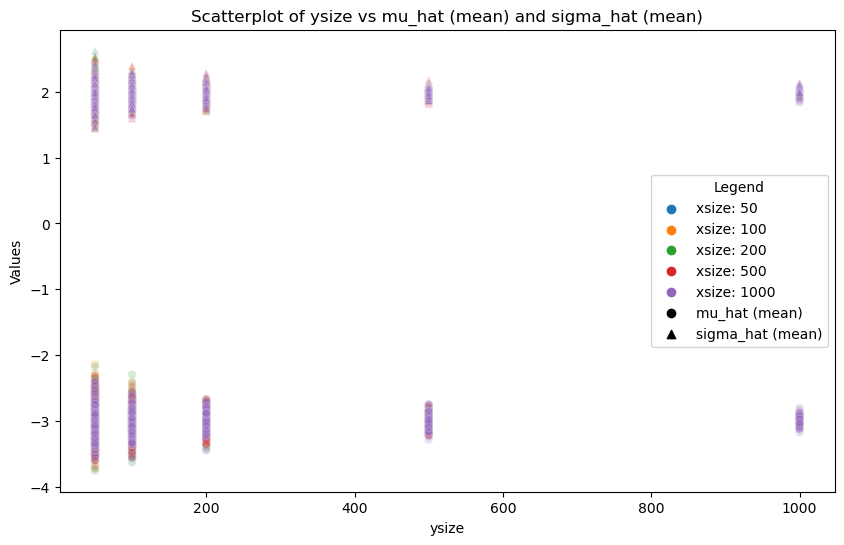

In [53]:
# Generate a color palette
palette = sns.color_palette(n_colors=len(hue.unique()))
hue_colors = {value: palette[i] for i, value in enumerate(hue.unique())}

# Initialize the plot
plt.figure(figsize=(10, 6))

# Create a scatterplot for mu_hat
sns.scatterplot(x=x, y=y_mu_hat, hue=hue, palette=hue_colors, marker='o', legend=False, alpha=0.2)

# Create a scatterplot for sigma_hat
sns.scatterplot(x=x, y=y_sigma_hat, hue=hue, palette=hue_colors, marker='^', legend=False, alpha=0.2)

# Add a combined legend
for hue_value, color in hue_colors.items():
    plt.scatter([], [], color=color, label=f'xsize: {hue_value}')

plt.scatter([], [], color='black', marker='o', label='mu_hat (mean)')
plt.scatter([], [], color='black', marker='^', label='sigma_hat (mean)')

# Customize the plot
plt.title('Scatterplot of ysize vs mu_hat (mean) and sigma_hat (mean)')
plt.xlabel('ysize')
plt.ylabel('Values')
plt.legend(title='Legend')
plt.show()

# Violin chart for sample sizes

In [12]:
saving_path_sample_size_effect = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Violin_sample_size_effect"

In [13]:
# getting the individual parameter combination sub dataframes 

df_last_150_aggregated_index_reset = df_last_150_aggregated.reset_index()


# Get the unique combinations of the multi-index levels

param_combinations = df_last_150_aggregated_index_reset.groupby(["mu", "sigma", "b"]).groups.keys()
param_combinations

dict_keys([(-3, 2, 'b0.01'), (-3, 2, 'b0.1'), (-3, 2, 'bAUTO'), (-3, 40, 'b0.01'), (-3, 40, 'b0.1'), (-3, 40, 'bAUTO'), (50, 2, 'b0.01'), (50, 2, 'b0.1'), (50, 2, 'bAUTO'), (50, 40, 'b0.01'), (50, 40, 'b0.1'), (50, 40, 'bAUTO')])

In [14]:
# # go through the different simulation runs => 180
# counter = 0
# # Iterate through each combination of index levels
# for mu, sigma, b in param_combinations:

# 	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
# 						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
# 						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
# 	# Reset the multi-index and flatten the columns
# 	simulations_df = simulations_df.reset_index()
# 	simulations_df.columns = ['_'.join(filter(None, col)).strip() for col in simulations_df.columns.values]

# 	# Rename the columns for easier access
# 	simulations_df.rename(columns={
# 	'ysize_': 'ysize',
# 	'xsize_': 'xsize',
# 	'mu_hat_mean': 'mu_hat_mean',
# 	'sigma_hat_mean': 'sigma_hat_mean'
# 	}, inplace=True)

# 	# Melt the DataFrame to long format for easier plotting with seaborn
# 	df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['mu_hat_mean', 'sigma_hat_mean'], 
# 			var_name='Type', value_name='Mean')

# 	# Create a FacetGrid for separate violin plots by xsize
# 	g = sns.FacetGrid(df_long, col="xsize", col_wrap=3, sharey=True, height=5, aspect=1)

# 	# Map the violinplot to the FacetGrid
# 	g.map_dataframe(sns.violinplot, x='ysize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)

# 	# Add horizontal lines to each subplot
# 	for ax in g.axes.flat:
# 		ax.axhline(y=simulations_df["mu"].iloc[0], color='blue', linestyle='--', linewidth=1)
# 		ax.axhline(y=simulations_df["sigma"].iloc[0], color='orange', linestyle='-', linewidth=1)

# 	# Get handles and labels from the first axis
# 	handles, labels = g.axes.flat[0].get_legend_handles_labels()

# 	# Replace old labels with LaTeX formatted ones

	
# 	new_labels = [r'$\hat{\mu}$' if label == 'mu_hat_mean' else r'$\hat{\sigma}$' for label in labels]

# 	# Manually add the new legend
# 	# Create a new legend with the handles and updated labels
# 	for ax in g.axes.flat:
# 		ax.legend(handles=handles, labels=new_labels, title='Parameter')

# 	# Set titles and axis labels
# 	g.set_axis_labels('ysize', 'Parameter Values')
# 	g.set_titles(col_template='xsize: {col_name}')

# 	# Adjust the main title
# 	plt.subplots_adjust(top=0.93)

# 	mu_latex = r"$\mu$"
# 	sigma_latex = r"$\sigma$"
# 	g.figure.suptitle(f'Parameter distribution for different ysample and xsample sizes with  {mu_latex} = {mu}, {sigma_latex} = {sigma} and {b}')

# 	file_name = f"mu{mu}_sigma{sigma}_{b}"

# 	plt.savefig(f"{saving_path_sample_size_effect}\{file_name}.png")

# 	plt.close()

# 	counter += 1

# 	print(f"created and saved {counter} figures")
	

	

<string>:63: SyntaxWarning: invalid escape sequence '\{'
<>:63: SyntaxWarning: invalid escape sequence '\{'
<string>:63: SyntaxWarning: invalid escape sequence '\{'
<>:63: SyntaxWarning: invalid escape sequence '\{'
C:\Users\nickk\AppData\Local\Temp\ipykernel_27972\441295557.py:63: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f"{saving_path_sample_size_effect}\{file_name}.png")


created and saved 1 figures
created and saved 2 figures
created and saved 3 figures
created and saved 4 figures
created and saved 5 figures
created and saved 6 figures
created and saved 7 figures
created and saved 8 figures
created and saved 9 figures
created and saved 10 figures
created and saved 11 figures
created and saved 12 figures
